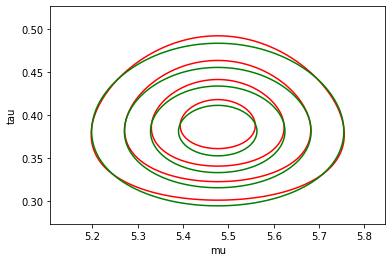

In [2]:
import numpy as np
from matplotlib.pyplot import contour
from scipy.special import gamma as fct_gamma
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt
"""
    Approximate the posterior probability P(Z/X) using VI
"""


def generate_data(a0, b0, mu0, lambda0, size):
    """
    Generate observations X knowing the priors probabilities P(T) and P(mu/T)
    we draw T from a gamma distribution, then we drawn mu from a normal distribution
    knowing T, and finally we drawn X_i from a normal distribution knowing T and mu.
    """
    if b0 != 0:
      t = np.random.gamma(a0, 1/b0, 1)
    else:
      t = 1
    if(t == 0):
      t = 10**(-20)
    if lambda0 != 0:
      mu = np.random.normal(mu0, 1/np.sqrt((lambda0 * t)), 1)
    else:
      mu = 0
    return np.random.normal(mu, 1/np.sqrt(t), size)

def compute_posterior_parameter(X, a0, b0, mu0, lambda0):
    N = len(X)
    # simple parameter
    mu_N = (lambda0 * mu0 + sum(X))/(lambda0 + N)
    a_N = a0 + N/2
    # find lambda_N and b_N by an iteratifve approach
    b_N = np.random.random()
    mean_t = a_N/b_N
    iter = 100
    while(iter > 0):
        lambda_N = (lambda0 + N)*mean_t
        mean_mu = mu_N
        mean_mu_square = 1/lambda_N + mu_N**2
        b_N = b0 + 0.5 * ((N + lambda0)*mean_mu_square - 2 *(sum(X) + lambda0*mu0) * mean_mu + lambda0*(mu0**2) + sum(X**2))
        mean_t = a_N/b_N
        iter -= 1
    return [mu_N, lambda_N, a_N, b_N]

def exact_posterior(D, t, mu, a0, b0, mu0, lambda0):
  prior_t = gamma(a = a0, loc = 0, scale = 1/b0).pdf(t)
  prior_mu = norm(mu0, 1/np.sqrt(lambda0 * t)).pdf(mu)
  likelihood = np.sum(np.log(norm(mu, np.sqrt(1/t)).pdf(D)))
  return likelihood + np.log(prior_t) + np.log(prior_mu)


def normal_gamma(mu, lamda, a, b, mus, ts):
  # the formula of the exact posterior is calculated in the report
  gamma = np.array((b**a)*np.sqrt(lamda) / (fct_gamma(a)*np.sqrt(2*np.pi)) * ts**(a-0.5)* np.exp(-b*ts))
  normal = np.array(np.exp(-0.5*lamda*np.dot(ts,((mus-mu)**2).T)))
  return  gamma * normal 


def normal_dist(mu, t, X):
  return np.array(np.sqrt(t/(2*np.pi)) * np.exp(-0.5 * np.dot(t, np.transpose((X - mu)**2))))


def gamma_dist(a, b, X):
  return np.array((1/fct_gamma(a)) * b**a * X**(a-1) * np.exp(-b*X))


def main():
    # choice of parameters
    a0, b0, mu0, lambda0, size = 1, 4, 5, 2, 100
    # generate data
    D = generate_data(a0, b0, mu0, lambda0, size)
    # compute an approximation of posterior probability 
    mu_N, lambda_N, a_N, b_N = compute_posterior_parameter(D, a0, b0, mu0, lambda0)
    # plot
    mus = np.linspace(norm(mu_N, 1/np.sqrt(lambda_N)).ppf(0.01), norm(mu_N, 1/np.sqrt(lambda_N)).ppf(0.99), 100)
    ts = np.linspace(gamma(a = a_N, scale = 1/b_N, loc = 0).ppf(0.01), gamma(a = a_N, scale = 1/b_N, loc = 0).ppf(0.99), 100)
    #
    q_u = normal_dist(mu_N, lambda_N, mus.reshape(len(mus), 1))
    q_t = gamma_dist(a_N, b_N, ts.reshape(len(ts), 1))
    Z = q_u*q_t

    N = len(D)
    mu_exacte = (lambda0 * mu0 + np.sum(D)) / (lambda0 + N)
    lambda_exacte = lambda0 + N
    a_exacte = a0 + N/2
    b_exacte = b0 + 0.5*sum((D-np.mean(D))**2) + (lambda0*N*(np.mean(D)-mu0)**2)/(2*(lambda0+N))

    Z_exacte = normal_gamma(mu_exacte, lambda_exacte, a_exacte, b_exacte, mus.reshape(len(mus), 1), ts.reshape(len(ts), 1))
    # plot
    X, Y = np.meshgrid(mus, ts)
    contour(X, Y, Z_exacte, 5, colors='red')
    contour(X, Y, Z, 5, colors='green')
    plt.xlabel('mu')
    plt.ylabel('tau')
main()




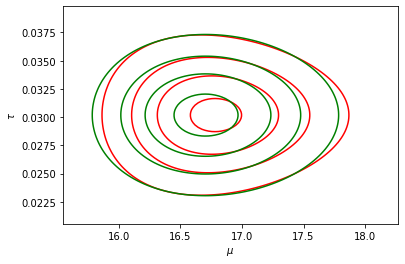

In [3]:
import numpy as np
from matplotlib.pyplot import contour
from scipy.special import gamma as fct_gamma
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt
#import scipy
"""
    Approximate the posterior probability P(Z/X) using VI
"""

def generate_data(a0, b0, mu0, lambda0, size):
    """
    Generate observations X knowing the priors probabilities P(T) and P(mu/T)
    we draw T from a gamma distribution, then we drawn mu from a normal distribution
    knowing T, and finally we drawn X_i from a normal distribution knowing T and mu.
    """
    if b0 != 0:
      t = np.random.gamma(a0, 1/b0, 1)
    else:
      t = 1
    if(t == 0):
      t = 10**(-20)
    if lambda0 != 0:
      mu = np.random.normal(mu0, 1/np.sqrt((lambda0 * t)), 1)
    else:
      mu = 0
    return np.random.normal(mu, 1/np.sqrt(t), size)
    #return np.random.normal(0, 1, size)

def compute_posterior_parameter(X, a0, b0, mu0, lambda0):
    N = len(X)
    # simple parameter
    mu_N = (lambda0 * mu0 + sum(X))/(lambda0 + N)
    a_N = a0 + N/2
    # find lambda_N and b_N by an iteratifve approach
    b_N = np.random.random()
    mean_t = a_N/b_N
    iter = 100
    while(iter > 0):
        lambda_N = (lambda0 + N)*mean_t
        mean_mu = mu_N
        mean_mu_square = 1/lambda_N + mu_N**2
        b_N = b0 + 0.5 * ((N + lambda0)*mean_mu_square - 2 *(sum(X) + lambda0*mu0) * mean_mu + lambda0*(mu0**2) + sum(X**2))
        mean_t = a_N/b_N
        iter -= 1
    return [mu_N, lambda_N, a_N, b_N]

# def exact_posterior(D, t, mu, a0, b0, mu0, lambda0):
#   prior_t = gamma(a = a0, loc = 0, scale = 1/b0).pdf(t)
#   prior_mu = norm(mu0, 1/np.sqrt(lambda0 * t)).pdf(mu)
#   likelihood = np.prod(norm(mu, np.sqrt(1/t)).pdf(D))
#   print(likelihood)
#   return likelihood*prior_t*prior_mu

def exact_posterior(D, t, mu, a0, b0, mu0, lambda0):
  prior_t = gamma(a = a0, loc = 0, scale = 1/b0).pdf(t)
  prior_mu = norm(mu0, 1/np.sqrt(lambda0 * t)).pdf(mu)
  likelihood = np.sum(np.log(norm(mu, np.sqrt(1/t)).pdf(D)))
  return likelihood + np.log(prior_t) + np.log(prior_mu)



def normal_gamma(mu, lamda, a, b, mus, ts):
  # the formula of the exact posterior is calculated in the report
  gamma = np.array((b**a)*sqrt(lamda) / (fct_gamma(a)*sqrt(2*pi)) * ts**(a-0.5)* np.exp(-b*ts))
  normal = np.array(np.exp(-0.5*lamda*np.dot(ts,((mus-mu)**2).T)))
  return  gamma * normal 


def normal_dist(mu, t, X):
  return np.array(sqrt(t/(2*pi)) * np.exp(-0.5 * np.dot(t, np.transpose((X - mu)**2))))


def gamma_dist(a, b, X):
  return np.array((1/fct_gamma(a)) * b**a * X**(a-1) * np.exp(-b*X))


def main():
    # choice of parameters
    a0, b0, mu0, lambda0, size = 0.1, 0.1, 0.1, 0.1, 100
    # generate data
    D = generate_data(a0, b0, mu0, lambda0, size)
    # compute an approximation of posterior probability 
    mu_N, lambda_N, a_N, b_N = compute_posterior_parameter(D, a0, b0, mu0, lambda0)
    # plot .....
    mus = np.linspace(norm(mu_N, 1/np.sqrt(lambda_N)).ppf(0.01), norm(mu_N, 1/np.sqrt(lambda_N)).ppf(0.99), 100)
    ts = np.linspace(gamma(a = a_N, scale = 1/b_N, loc = 0).ppf(0.01), gamma(a = a_N, scale = 1/b_N, loc = 0).ppf(0.99), 100)
    #
    q_u = norm(mu_N, 1/np.sqrt(lambda_N)).pdf(mus)
    q_t = gamma(a = a_N, scale = 1/b_N, loc = 0).pdf(ts)
    q_u = q_u.reshape(len(q_u), 1)
    q_t = q_t.reshape(1, len(q_t))
    Z = q_u.dot(q_t)

    # exacte posterior
    Z_exacte = np.array([exact_posterior(D, t, mu, a0, b0, mu0, lambda0) for mu in mus for t in ts])
    Z_exacte = Z_exacte.reshape((len(mus), len(ts)))
    Z_exacte = np.exp(Z_exacte - np.mean(Z_exacte))
    # compute the exact posterior
    # parameters of normal gamma distribution

    N = len(D)
    mu_exacte = (lambda0 * mu0 + np.sum(D)) / (lambda0 + N)
    lambda_exacte = lambda0 + N
    a_exacte = a0 + N/2
    b_exacte = b0 + 0.5*sum((D-np.mean(D))**2) + (lambda0*N*(np.mean(D)-mu0)**2)/(2*(lambda0+N))

    #Z_exacte = normal_gamma(mu_exacte, lambda_exacte, a_exacte, b_exacte, mus.reshape(len(mus), 1), ts.reshape(len(ts), 1))
    # plot
    X, Y = np.meshgrid(mus, ts)
    contour(X, Y, Z_exacte, 5, colors='red')
    contour(X, Y, Z, 5, colors='green')
    plt.xlabel('$\\mu$')
    plt.ylabel('$\\tau$')
main()